In [56]:
from qutip import *
import numpy as np
from scipy import integrate
from helper_code_qutip import * 
import scipy.io

In [76]:
matlab_data1 = scipy.io.loadmat('../matlab/data_plotting_vs_e/data_2_4_1.mat',mat_dtype=False)
matlab_data2 = scipy.io.loadmat('../matlab/data_plotting_vs_e/data_2_4_2.mat',mat_dtype=False)  # is set to True, givex complex casting to real errors..

In [60]:
betalist1 = matlab_data1['betalist'][0]
betalist2 = matlab_data2['betalist'][0]

deltalist = matlab_data1['deltalist'][0]

super_gamma_matrices1 = matlab_data1['super_gamma_matrices'][0]
super_ls_matrices1 = matlab_data1['super_lamb_shift_matrices'][0]

super_gamma_matrices2 = matlab_data2['super_gamma_matrices'][0]
super_ls_matrices2 = matlab_data2['super_lamb_shift_matrices'][0]

NL1 = int(matlab_data1["NL"][0,0])
NL2 = int(matlab_data2["NL"][0,0])
NM = int(matlab_data2["NM"][0,0])

print('NL and NM are ', NL1, NM, 'respectively')

N = NL1 + NM
dL1 = 2**NL1
dL2 = 2**NL2
dM = 2**NM
d = 2**N
dims = [2]*N

print(super_gamma_matrices1[0].shape)
print(super_gamma_matrices2[0].shape)

print(betalist1)
print(betalist2)

print(deltalist)

NL and NM are  2 4 respectively
(1, 14)
(1, 14)
[2.5        1.42857143 1.        ]
[10]
[0.         0.00263158 0.00789474 0.01052632 0.01315789 0.01578947
 0.02368421 0.02631579 0.03157895 0.03421053 0.03684211 0.03947368
 0.04736842 0.05      ]


In [61]:
print(super_gamma_matrices1[0][0][0])

<Compressed Sparse Column sparse matrix of dtype 'complex128'
	with 171 stored elements and shape (15, 15)>
  Coords	Values
  (0, 0)	(2.583173946888294e-09+0j)
  (1, 0)	(-1.374735837088827e-16-3.31807746069739e-38j)
  (2, 0)	(-1.4196178222245675e-17+6.222080473756661e-39j)
  (3, 0)	(-3.720469111043328e-06+5.2266299194199075e-34j)
  (4, 0)	(1.803534438289564e-19-3.548832081414686e-38j)
  (6, 0)	(-3.7119450736323163e-09+6.4909902656319176e-37j)
  (7, 0)	(-1.370681006352841e-13-1.8732420835314731e-35j)
  (8, 0)	(-2.577573502373275e-20+5.915721596993648e-40j)
  (9, 0)	(3.717301986192586e-09-6.079050668178228e-37j)
  (11, 0)	(1.4342894907756318e-14+3.907829950262921e-37j)
  (12, 0)	(-2.2041848843434517e-09-2.7181714987709926e-39j)
  (13, 0)	(1.6499997175678437e-19+1.4564745913576067e-38j)
  (14, 0)	(-1.454780251242207e-19-1.0670557099395901e-38j)
  (0, 1)	(-1.374735837088827e-16+3.31807746069739e-38j)
  (1, 1)	(1.6525974521258898e-08+0j)
  (2, 1)	(-3.479115097518399e-18+1.9537643075205763e-

In [96]:
def matrix_transform(dL,gamma_matrix,ls_matrix):
    gamma_matr = np.zeros((dL**2-1,dL**2-1), dtype = complex)
    ls_matr = np.zeros((dL,dL), dtype = complex)

    for i in range(dL**2-1):
        for j in range(dL**2-1):
            gamma_matr[i,j] = gamma_matrix[i,j]

    for i in range(dL):
        for j in range(dL):
            ls_matr[i,j] = ls_matrix[i,j]

    return gamma_matr, ls_matr


fin_gamma_matrices1 = [0]*len(betalist1)
fin_ls_matrices1 = [0]*len(betalist1)

fin_gamma_matrices2 = [0]*len(betalist2)
fin_ls_matrices2 = [0]*len(betalist2)

for i in range(len(betalist1)):
    temp_list1 = [0]*len(deltalist)
    temp_list2 = [0]*len(deltalist)
    for j in range(len(deltalist)):
        temp_list1[j], temp_list2[j] = matrix_transform(dL1,super_gamma_matrices1[i][0][j],super_ls_matrices1[i][0][j])
    fin_gamma_matrices1[i], fin_ls_matrices1[i] = temp_list1, temp_list2

for i in range(len(betalist2)):
    temp_list1 = [0]*len(deltalist)
    temp_list2 = [0]*len(deltalist)
    for j in range(len(deltalist)):
        temp_list1[j], temp_list2[j] = matrix_transform(dL2,super_gamma_matrices2[i][0][j],super_ls_matrices2[i][0][j])
    fin_gamma_matrices2[i], fin_ls_matrices2[i] = temp_list1, temp_list2

In [98]:
print(fin_ls_matrices2[0][12])

[[ 1.47038060e-09+0.00000000e+00j -3.72119835e-11+2.50843047e-09j
  -1.72557080e-10+6.67228842e-11j  2.31350938e-10+2.13516399e-09j]
 [-3.72119835e-11-2.50843047e-09j -1.44848400e-09+0.00000000e+00j
   1.04310902e-09-9.95222887e-10j -2.19087395e-09-2.08598223e-09j]
 [-1.72557080e-10-6.67228842e-11j  1.04310902e-09+9.95222887e-10j
   1.12885346e-09+0.00000000e+00j  1.17561472e-09-3.43108271e-10j]
 [ 2.31350938e-10-2.13516399e-09j -2.19087395e-09+2.08598223e-09j
   1.17561472e-09+3.43108271e-10j  4.11796101e-10+0.00000000e+00j]]


In [46]:
matlab_data3 = scipy.io.loadmat('../matlab/thermal_data_new_1.mat',mat_dtype=False)  # is set to True, givex complex casting to real errors..
#matlab_data4 = scipy.io.loadmat('../matlab/thermal_data3.mat',mat_dtype=False)  # is set to True, givex complex casting to real errors..

In [74]:
matlab_F_list1 = matlab_data3["F1"]
F_list1 = []

matlab_F_list2 = matlab_data3["F2"]
F_list2 = []


for index in range(2**dL1):
    matrix1 = np.asmatrix(matlab_F_list1[0,index])
    matrix2 = np.asmatrix(matlab_F_list2[0,index])

    F_list1.append(Qobj(matrix1))
    F_list2.append(Qobj(matrix2))
    
if not basis_is_orthonormal(F_list1):
    print("WARNING : Basis 1 is NOT orthonormal")

if not basis_is_orthonormal(F_list2):
    print("WARNING : Basis 2 is NOT orthonormal")

F_list1.pop() #removes the last indentity basis ..
print(F_list2[-1]) # should be identity matrix
F_list2.pop()

for index in range(2**dL1-1):
    F_list1[index].dims = [dims,dims] # makes sure mutliplication will work and QuTiP wont throw errors. 
    F_list2[index].dims = [dims,dims]

Quantum object: dims=[[64], [64]], shape=(64, 64), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.125 0.    0.    ... 0.    0.    0.   ]
 [0.    0.125 0.    ... 0.    0.    0.   ]
 [0.    0.    0.125 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.125 0.    0.   ]
 [0.    0.    0.    ... 0.    0.125 0.   ]
 [0.    0.    0.    ... 0.    0.    0.125]]


In [77]:
w0list = matlab_data2["w0list2"][:,0]
w0list = w0list.astype('float')
print('w0list is ', w0list)

glist = matlab_data1["glist"][:,0]
glist = glist.astype('float')

print('glist is', glist)


w0list is  [1.   1.   1.   1.05 1.05 1.05]
glist is [0.0016 0.0016 0.0016 0.0016 0.0016]


In [75]:
p_c= 1.1e-2
p_h= 1e-3

In [87]:
def steady_state_calc(H_S,beta1, delta, gamma_matrix1, gamma_matrix2, ls_matrix1, ls_matrix2):

    
    [D1,U1] = np.linalg.eigh(gamma_matrix1)
    [D2,U2] = np.linalg.eigh(gamma_matrix2)

    L_list1 = []
    Udagger1 = np.transpose(np.conj(U1))
    L_list2 = []
    Udagger2 = np.transpose(np.conj(U2))

    for j  in range(dL1**2-1):
        op1 = 0
        op2 = 0
        for betaindex in range(dL1**2-1):    
            op1 = op1+Udagger1[j,betaindex]* F_list1[betaindex]
            op2 = op2+Udagger2[j,betaindex]* F_list2[betaindex]
        L_list1.append(op1)
        L_list2.append(op2)

    tildeL_list1 = []
    tildeL_list2 = []

    for index in range(dL1**2-1):
        tildeL_list1.append(np.sqrt(p_h*D1[index])*L_list1[index])
        tildeL_list2.append(np.sqrt(p_c*D2[index])*L_list2[index])

    tildeL_list = []
    for i in tildeL_list1:
        tildeL_list.append(i)

    for i in tildeL_list2:
        tildeL_list.append(i)

    H_LS1 = tensor(Qobj(ls_matrix1),qeye(dM))
    H_LS2 = tensor(qeye(dM),Qobj(ls_matrix2))
    H_LS1.dims = [dims,dims]
    H_LS2.dims = [dims,dims]
    
    L_operator = liouvillian(H_S+H_LS1+H_LS2, tildeL_list)
    rho_ss = steadystate(L_operator)

    L_eigen = L_operator.eigenenergies()

    print("Smallest eigenvalues for Th = ", 1/beta1, "and e = ", delta, "are ",L_eigen[-3:])

    return rho_ss

In [86]:
print(betalist1[0])
print(deltalist[2])

2.5
0.00789474


In [100]:
print(fin_gamma_matrices2[0][1])

[[ 6.34076869e-02+0.00000000e+00j -1.09769012e-12+7.43352911e-31j
   1.48301515e-15-2.36565135e-31j -6.34075321e-02-2.16968045e-33j
   4.49747567e-11-2.52384327e-31j  0.00000000e+00+0.00000000e+00j
  -2.43634628e-04+8.49665184e-32j -4.49456491e-11+1.76581727e-31j
  -6.62855571e-15+1.21071510e-34j  4.23204357e-04-1.31234258e-31j
   0.00000000e+00+0.00000000e+00j  6.61928442e-15+1.64459429e-33j
   2.19331637e-02-2.43390841e-29j  1.10085558e-11-2.41176503e-29j
   3.71919610e-16-1.56336235e-31j]
 [-1.09769012e-12-7.43352911e-31j  1.84091556e-02+0.00000000e+00j
   1.37582176e-22-9.96300111e-32j  1.09750862e-12+7.42207509e-31j
  -2.22235937e-04-1.55497145e-28j  0.00000000e+00+0.00000000e+00j
   1.74300240e-14+2.68931126e-32j  2.00619743e-04+1.55518888e-28j
   2.41195977e-24+1.49915570e-33j -3.03427337e-14-4.81977369e-32j
   0.00000000e+00+0.00000000e+00j -1.25725984e-24-7.28576725e-34j
  -4.98165194e-12-8.87939769e-30j -2.73303953e-02-3.34967366e-30j
   1.66684448e-22-7.37398891e-32j]
 [ 1.4

In [101]:
## Now, we will define the recursive solving method

cvx_ss = []

for i in range(len(betalist1)):
    list1 = []
    for j in range(len(deltalist)):
        delta = deltalist[j]
        w0list = np.zeros(N)
        w0list[0] = 1
        w0list[1] = 1
        w0list[2] = 1
        w0list[3] = 1 + delta
        w0list[4] = 1 + delta
        w0list[5] = 1 + delta
        H_S = create_hamiltonian2(w0list, glist,N)
        rho_ss = steady_state_calc(H_S,betalist1[i],deltalist[j],fin_gamma_matrices1[i][j],fin_gamma_matrices2[0][j],fin_ls_matrices1[i][j],fin_ls_matrices2[0][j])
        list1.append(rho_ss)
    cvx_ss.append(list1)


Smallest eigenvalues for Th =  0.4 and e =  0.0 are  [-1.15792294e-05-9.97117661e-01j -1.15792294e-05+9.97117661e-01j
  6.19975375e-16-1.99439198e-17j]
Smallest eigenvalues for Th =  0.4 and e =  0.00263158 are  [-6.06203386e-06+9.97570451e-01j -6.06203386e-06-9.97570451e-01j
 -1.60666350e-16+1.73445118e-15j]
Smallest eigenvalues for Th =  0.4 and e =  0.00789474 are  [-4.76731486e-06+9.97668333e-01j -4.76731486e-06-9.97668333e-01j
  8.26013712e-17+7.31098236e-17j]
Smallest eigenvalues for Th =  0.4 and e =  0.01052632 are  [-4.87063272e-06+9.97683721e-01j -4.87063272e-06-9.97683721e-01j
 -3.04476250e-17-5.54473197e-17j]
Smallest eigenvalues for Th =  0.4 and e =  0.01315789 are  [-4.91077083e-06-9.97693458e-01j -4.91077083e-06+9.97693458e-01j
  3.47056181e-16-2.29683792e-17j]
Smallest eigenvalues for Th =  0.4 and e =  0.01578947 are  [-4.95865615e-06-9.97700185e-01j -4.95865615e-06+9.97700185e-01j
  1.06555120e-16-1.79474561e-17j]
Smallest eigenvalues for Th =  0.4 and e =  0.0236842

In [102]:
print(cvx_ss)

[[Quantum object: dims=[[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape=(64, 64), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 6.81263848e-16+0.00000000e+00j -7.93728699e-23-1.29756951e-23j
   1.58599476e-22-2.45131627e-23j ... -2.91762131e-29-5.82907899e-30j
  -5.22237820e-31-5.27569385e-30j  4.46581953e-31+4.41598916e-30j]
 [-7.93728699e-23+1.29756951e-23j -9.69707841e-18+0.00000000e+00j
  -1.34796756e-18+4.19196232e-17j ... -5.04317920e-25-1.73551833e-27j
   5.83694069e-27-7.67152601e-27j -8.71070166e-30+1.98807807e-30j]
 [ 1.58599476e-22+2.45131627e-23j -1.34796756e-18-4.19196232e-17j
   8.24371435e-17+0.00000000e+00j ... -1.16506120e-26-2.47212781e-26j
  -5.02518368e-25-1.14081557e-27j -4.12136218e-28-3.72564924e-27j]
 ...
 [-2.91762131e-29+5.82907899e-30j -5.04317920e-25+1.73551833e-27j
  -1.16506120e-26+2.47212781e-26j ...  1.46140526e-04+0.00000000e+00j
  -1.70548441e-06+5.77094054e-06j  2.19027672e-09+2.12402041e-09j]
 [-5.22237820e-31+5.27569385e-30j  5.83694069e-27+7.

In [103]:
reduced_cvx_ss = []
#Take the partial trace, leaving only the middle two qubits
for i in range(len(betalist1)):
    list1 = []
    for j in range(len(deltalist)):
        rho_ss = cvx_ss[i][j]
        rho_ss = rho_ss.ptrace([2,3])
        list1.append(rho_ss)
    reduced_cvx_ss.append(list1)

In [104]:
print(reduced_cvx_ss[0][0])

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.89131111e-08+0.00000000e+00j  8.75230427e-15-2.86433447e-15j
   2.91523920e-16+2.34603034e-13j  1.37577804e-19+1.68212335e-18j]
 [ 8.75230427e-15+2.86433447e-15j  1.46214212e-04+0.00000000e+00j
  -1.70225568e-06+5.77417000e-06j  1.92326678e-12+1.60413641e-09j]
 [ 2.91523920e-16-2.34603034e-13j -1.70225568e-06-5.77417000e-06j
   1.46214234e-04+0.00000000e+00j -3.51736760e-12-5.96302477e-12j]
 [ 1.37577804e-19-1.68212335e-18j  1.92326678e-12-1.60413641e-09j
  -3.51736760e-12+5.96302477e-12j  9.99707553e-01+0.00000000e+00j]]


In [107]:
def concurrence_plot(Th_list,elist,reduced_dm_list):
    for i in range(len(Th_list)):
        concurrence_list = []
        for j in range(len(elist)):
            concurrence_list.append(concurrence(reduced_dm_list[i][j]))
            #print(f'Concurrence Qutip for Tc = {Tc_list[i]} and Th = {round(Th_list[j],2)}: ',concurrence(reduced_dm_list[i][j]))
        plt.plot(elist,concurrence_list,label='Th/Eh = '+str(Th_list[i]))
        ##save the data
        np.save(f'CVX_data/concurrence_data_{i}',concurrence_list)

    plt.xlabel('delta/Eh')
    plt.ylabel('Concurrence')
    plt.title(f'Concurrence (CVX) for different Th at g = 1.6e-3, ph = 1e-3, pc = 1.1e-2')
    plt.legend()

    plt.show()


def negativity1(rho):
    a1 = rho[0,0]
    a4 = rho[3,3]
    c = np.abs(rho[1,2])
    val = 0.5*(np.sqrt(4*c**2 + (a1-a4)**2) - (a1+a4))  #How did it know the function?? Very cool
    if val < 0:
        return 0
    else:
        return val

def negativity_plot(Th_list,elist,reduced_dm_list):
    for i in range(len(Th_list)):
        neg_list = []
        for j in range(len(elist)):
            neg_list.append(negativity1(reduced_dm_list[i][j]))
        plt.plot(elist,neg_list,label='Th/Eh = '+str(Th_list[i]))

    plt.xlabel('delta/Eh')
    plt.ylabel('Negativity')
    plt.title(f'Negativity (LLE) for different Th at g = {g}, ph = 1e-3, pc = 1.1e-2')
    plt.legend()

    plt.show()

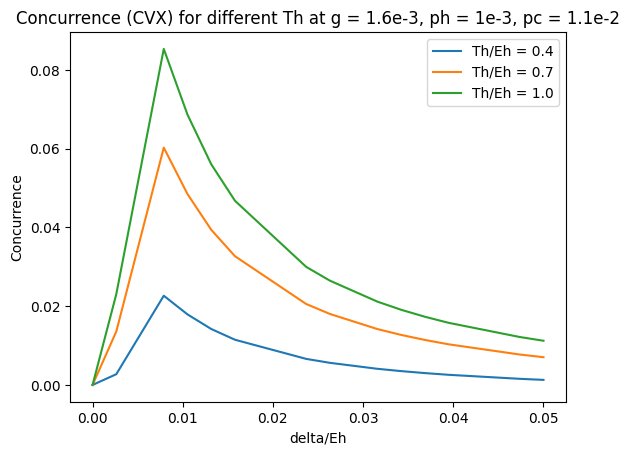

In [108]:
Th_list = [1/val for val in betalist1]
elist = deltalist

concurrence_plot(Th_list,elist,reduced_cvx_ss)

In [119]:
## Let us plot heat current as well

def thermal_h(E,T_h):
    r_c = 1/(1+np.exp(-E/T_h))
    t_h = r_c*fock_dm(2,1) + (1-r_c)*fock_dm(2,0)

    return t_h

def heat_current(Th_list,elist,reduced_dm_list):
    for i in range(len(Th_list)):
        heat_curr_list = []
        for j in range(len(elist)):
            ss = reduced_dm_list[i][j]
            rho_h = ss.ptrace(0)
            thermal_cold = thermal_h(1.0,Th_list[i])

            heat_curr = -p_h*(fock(2,0).dag()*(rho_h - thermal_cold)*fock(2,0))  #as |0> is the excited state

            heat_curr_list.append(heat_curr.real)
        plt.plot(elist,heat_curr_list,label='Th/Eh = '+str(Th_list[i]))
        np.save(f'CVX_data/heat_current_data_{i}',heat_curr_list)
    
    plt.xlabel('delta/Eh')
    plt.ylabel('Heat current')
    plt.title(f'Heat current (CVX) for different Th at g = 1.6e-3, ph = 1e-3, pc = 1.1e-2')
    plt.legend()

    plt.show()


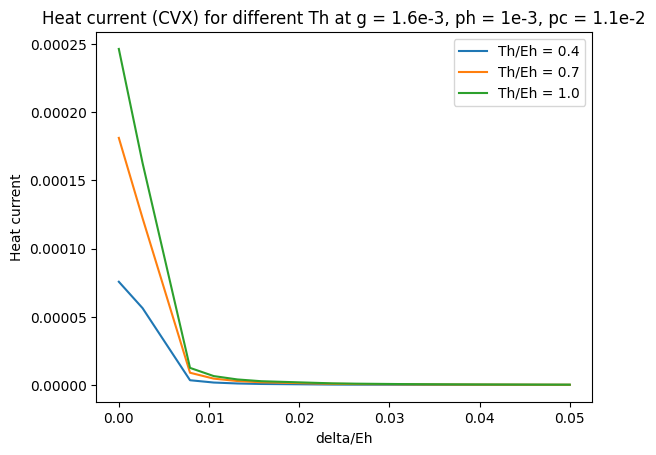

In [120]:
heat_current(Th_list,elist,reduced_cvx_ss)